In [1]:
import pandas as pd

import numpy as np

from sklearn import decomposition

from sklearn import preprocessing

from functions import *

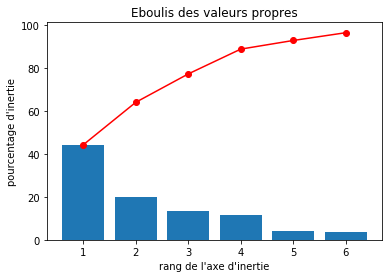

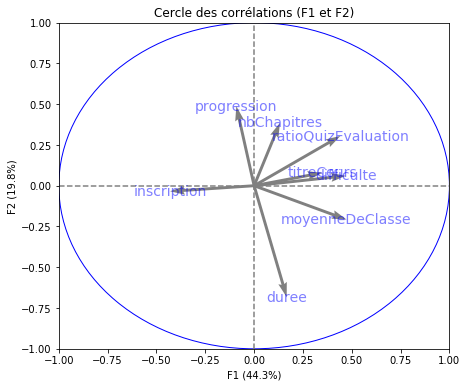

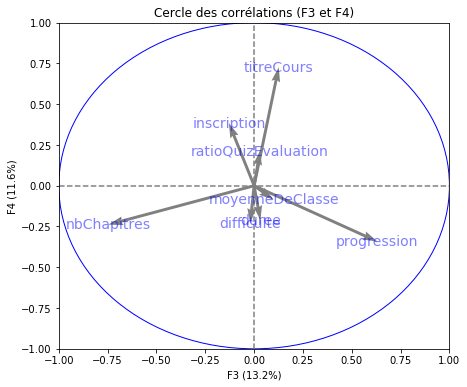

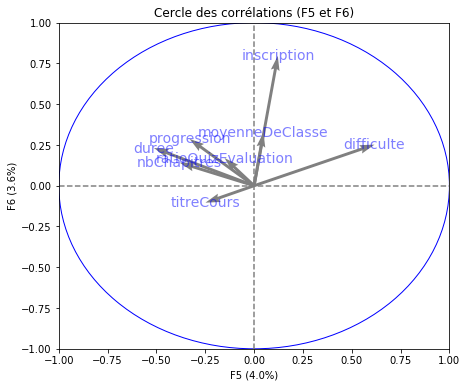

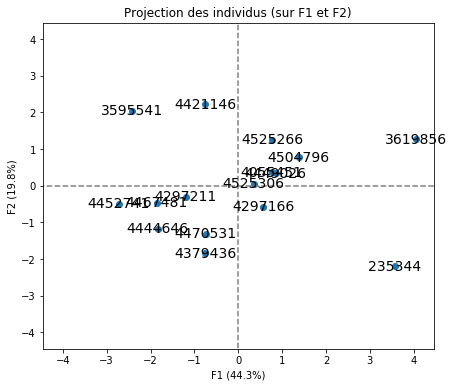

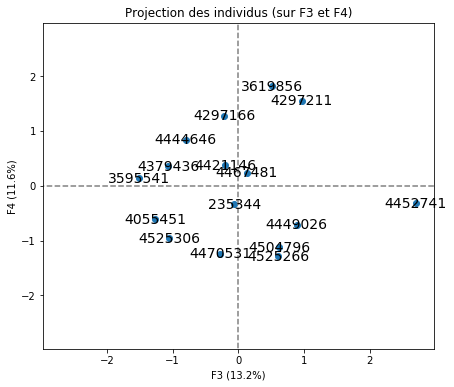

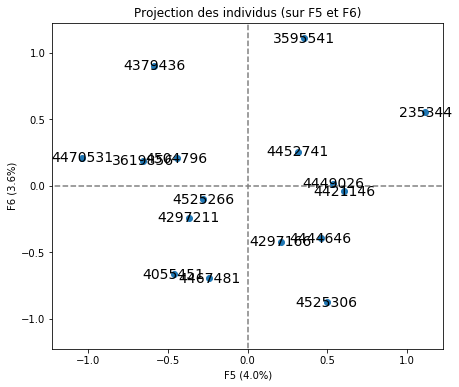

In [11]:
#Choix du nombre de composantes à calculer : 
n_comp = 6

#Import de l'échantillon : 
data = pd.read_csv("my_courses.csv")

# Selection des colonnes à prendre en compte dans l'ACP : 
data_pca = data[["inscription", "progression", "moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]]

#Préparation des données pour l'ACP :
data_pca = data_pca.fillna(data_pca.mean()) #On remplace les valeurs inconnues par la moyenne de la variable

X = data_pca.values #On ne prend que les valeurs

names = data["idCours"] #Ou data.index pour avoir les intitulés des cours (ici on a uniquement les id)

features = data.columns

#Centrage et réduction : 
std_scale = preprocessing.StandardScaler().fit(X) #On appelle la fonction preprocessing pour centrer
X_scaled = std_scale.transform(X) #On réduit

#Calcul des composantes principales 
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)

#Eboulis des valeurs propres 
display_scree_plot(pca)

#Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1), (2,3), (4,5)], labels = np.array(features))

#Projection des individus 
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1), (2,3), (4,5)], labels = np.array(names))

plt.show()